In [6]:
import numpy as np 
import torch
import matplotlib.pyplot as plt
from imageio import imread, imwrite
from torch import nn
import random

In [7]:
import sys
sys.path.append("..")
# from steganogan.decoders import DenseDecoderNLayers
from steganogan.decoders import BasicDecoder, DenseDecoder, DenseDecoderNLayers
from steganogan import SteganoGAN

In [8]:
import torch
import torchvision

In [9]:
def shuffle_params(m):
    if type(m)==nn.Conv2d or type(m)==nn.BatchNorm2d:
        param = m.weight
        m.weight.data = nn.Parameter(torch.tensor(np.random.normal(0, 1, param.shape)).float())
        
        param = m.bias
        m.bias.data = nn.Parameter(torch.zeros(len(param.view(-1))).float().reshape(param.shape))
#         

In [23]:
# models
model_name = "steg_decode_new"
if model_name == "steg_decode":
#     steganogan = SteganoGAN.load(architecture='dense', path=None, cuda=True, verbose=True)
    steganogan = SteganoGAN.load(path="demo_1.1.steg", cuda=True, verbose=True)
    model = steganogan.decoder
    model.apply(shuffle_params)
elif model_name == "steg_decode_new":
    model = BasicDecoder(1, hidden_size=32)
    model.apply(shuffle_params)
    model.to('cuda')
else:
    print("unknown model")

model.to('cuda')

BasicDecoder(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.01, inplace)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [24]:
model

BasicDecoder(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01, inplace)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.01, inplace)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(32, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)

In [25]:
# load image
image = "/home/vk352/FaceDetection/datasets/sample/obama2.jpg"
image = imread(image, pilmode='RGB') 
image.shape

(612, 450, 3)

In [26]:
# extract a bit vector
image = "/home/vk352/FaceDetection/datasets/sample/obama2.jpg"
image = imread(image, pilmode='RGB') / 255.0
image = torch.FloatTensor(image).permute(2, 1, 0).unsqueeze(0)
image = image.to('cuda')
out = model(image)
# image = self.decoder(image).view(-1) > 0

In [27]:
target = torch.bernoulli(torch.empty(out.shape).uniform_(0, 1)).to(out.device)
target.shape

torch.Size([1, 1, 450, 612])

In [41]:
# pgd attack
steps = 1000
eps=0.2
alpha=2/255
adv_image = image.clone().detach()

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')

for i in range(steps):
    adv_image.requires_grad = True
    outputs = model(adv_image)
    
    outputs = outputs

    loss = criterion(outputs, target)
    print(loss)

    grad = torch.autograd.grad(loss, adv_image,
                               retain_graph=False, create_graph=False)[0]

    adv_image = adv_image.detach() - alpha*grad.sign()
    delta = torch.clamp(adv_image - image, min=-eps, max=eps)
    adv_image = torch.clamp(image + delta, min=0, max=1).detach()

tensor(1802399.5000, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1465351.6250, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1218505.2500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1023636.3750, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(862777.2500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(734635.2500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(628250.8750, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(543365.1875, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(472744.8125, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(413839.7500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(366297.0312, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithL

tensor(2348.5256, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2186.0352, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2198.6309, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(2082.5649, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1947.2510, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1845.9500, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1848.5999, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1774.1801, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1685.7319, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1595.9836, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(1583.6361, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(157

tensor(233.0434, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(221.9527, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(227.9254, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(238.7743, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(247.3001, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(225.1506, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(232.6992, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(209.8836, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(232.3889, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(227.7561, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(246.8255, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(223.7187, devi

tensor(126.0051, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(128.2318, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(125.7075, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(138.8191, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(128.3752, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(136.8336, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(123.5565, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(114.4405, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(128.4203, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(155.1112, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(119.7562, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(128.1927, devi

tensor(87.7893, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(90.2279, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(93.2866, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(109.3888, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(110.1787, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(94.8231, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(100.4218, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(102.7371, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(117.7201, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(88.6489, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(104.0249, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(90.4283, device='cu

tensor(81.4103, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(84.0922, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(77.8497, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(85.7771, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(90.2317, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(92.6332, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(98.9341, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(82.3266, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(75.0568, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(71.8073, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(79.8153, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(75.7907, device='cuda:0',

tensor(85.1701, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(69.7730, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(76.4589, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(82.9410, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(75.8573, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(71.0415, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(69.0197, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(74.1194, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(64.1124, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(73.8321, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(63.9298, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(59.9584, device='cuda:0',

tensor(49.7001, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.5581, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(49.6372, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(64.2683, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(60.1726, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(57.8825, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(57.3397, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.7421, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(56.4493, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(71.3047, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(66.5316, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(65.0990, device='cuda:0',

tensor(56.2546, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(53.4707, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(52.8465, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(55.2181, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(48.8307, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(54.6280, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(61.6236, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.3364, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(46.8016, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(60.0742, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.7874, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(51.5674, device='cuda:0',

tensor(52.1545, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(44.7504, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(53.8551, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.6604, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(54.6115, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(47.3930, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(44.8152, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(46.6078, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.3993, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(51.6350, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(49.1526, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(53.4410, device='cuda:0',

tensor(46.0969, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(46.6411, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(48.0063, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(45.8320, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(40.6749, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(50.1407, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(41.4893, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(48.6656, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(55.4457, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(46.1202, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(46.4769, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(53.6536, device='cuda:0',

In [42]:
output = (model(adv_image)>0)
# output = (out>0)

In [43]:
print("Number of Incorrect bits:")
print(len(torch.nonzero(output.float().view(-1) != target.view(-1))))

Number of Incorrect bits:
7


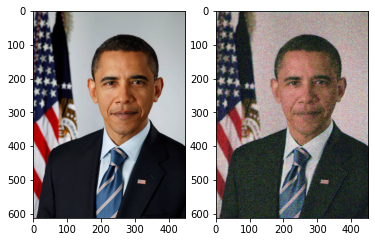

In [44]:
fig, axs = plt.subplots(1, 2)

axs[0].imshow(image.cpu().squeeze().permute(2,1,0))
axs[1].imshow(adv_image.cpu().squeeze().permute(2,1,0))